In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
plt.style.use('seaborn')

from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier
import itertools
from sklearn.dummy import DummyClassifier
from sklearn import metrics

<ipython-input-1-b9a0c44da580>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [5]:
df = pd.read_csv('heart.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.shape

(303, 14)

Variable Descriptions
age: age in years
sex: sex (1 = male; 0 = female)
cp: chest pain type - Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results- Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment- Value 1: upsloping, Value 2: flat, Value 3: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
target: 1 = disease, 0 = no disease


Variable Types
Continuous - age, trestbps, chol, thalach, oldpeak
Binary - sex, fbs, exang, target
Categorical - cp, restecg, slope, ca, thal

In [9]:
y = df.target.value_counts()
x = ['Disease','No Disease']

title = go.layout.Title(text='Target Variable (Heart Disease) Distribution')
layout = go.Layout(title=title)
data = go.Bar(x=x,y=y,text=y,textposition='auto')
fig = go.Figure(data=[data],layout=layout)

fig.update_xaxes(title_text='Target')
fig.update_yaxes(title_text='Number of Individuals')
fig.show()

In [10]:
fig = px.histogram(df,x='age',color_discrete_sequence=['coral'])
fig.update_xaxes(title_text='Age')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Distribution of Age.')

fig.show()

In [11]:
female = df[df['sex']==0]
female_count = female.target.value_counts()

male = df[df['sex']==1]
male_count = male.target.value_counts()


male_data = go.Bar(name='male',x=male_count.index,y=male_count,text=male_count,textposition='auto')
female_data = go.Bar(name='female',x=female_count.index,y=female_count,text=female_count,textposition='auto')

fig = go.Figure(data=[male_data,female_data])

fig.update_xaxes(title_text='Target')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Distribution of Sex According to Target Variable',barmode='group')
fig.show()

In [12]:
cp = ['Typical Angina','Atypical Angina','Non-Anginal Pain','Asymptomatic']

cp_y0 = df[df['target']==0].cp.value_counts()
cp_y1 = df[df['target']==1].cp.value_counts()

non_disease_data = go.Bar(name='No Disease',x=cp,y=cp_y0)
disease_data = go.Bar(name='Disease',x=cp,y=cp_y1)

fig = go.Figure(data=[non_disease_data,disease_data])
fig.update_xaxes(title_text='Chest Pain Type')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Distribution of Target Variable According to Chest Pain.',barmode='group')

fig.show()

Fasting blood sugar (FBS) is a diabetes indicator with FBS >120 mg/d is considered diabetic (True). Here, we see that the number for class True, is lower compared to class False. However, if we look closely, there are higher number of heart disease patient without diabetes. This provide an indication that fbs might not be a strong feature differentiating between heart disease an non-disease patient.

In [13]:
disease_values = df[df['target']==1].fbs.value_counts()
no_disease_values = df[df['target']==0].fbs.value_counts()

x = ['No Blood Sugar','Blood Sugar']

disease_data = go.Bar(name='Disease',x=x,y=disease_values,textposition='auto')
no_disease_data = go.Bar(name='No Disease',x=x,y=no_disease_values,textposition='auto')

fig = go.Figure(data=[disease_data,no_disease_data])
fig.update_layout(title_text='Distribution of Target Variable According to Fasting Blood Sugar',barmode='group')
fig.update_xaxes(title_text='Fasting Blood Sugar(FBS)')
fig.update_yaxes(title_text='Count')

fig.show()

In [14]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [15]:
df[df['thal']==0] = np.NaN

In [16]:
df.ca.value_counts()

0.0    173
1.0     65
2.0     38
3.0     20
4.0      5
Name: ca, dtype: int64

In [17]:
df[df['ca']==4] = np.NaN

In [18]:
df = df.fillna(df.median())

age            Axes(0.125,0.53;0.0945122x0.35)
sex         Axes(0.238415,0.53;0.0945122x0.35)
cp          Axes(0.351829,0.53;0.0945122x0.35)
trestbps    Axes(0.465244,0.53;0.0945122x0.35)
chol        Axes(0.578659,0.53;0.0945122x0.35)
fbs         Axes(0.692073,0.53;0.0945122x0.35)
restecg     Axes(0.805488,0.53;0.0945122x0.35)
thalach        Axes(0.125,0.11;0.0945122x0.35)
exang       Axes(0.238415,0.11;0.0945122x0.35)
oldpeak     Axes(0.351829,0.11;0.0945122x0.35)
slope       Axes(0.465244,0.11;0.0945122x0.35)
ca          Axes(0.578659,0.11;0.0945122x0.35)
thal        Axes(0.692073,0.11;0.0945122x0.35)
target      Axes(0.805488,0.11;0.0945122x0.35)
dtype: object

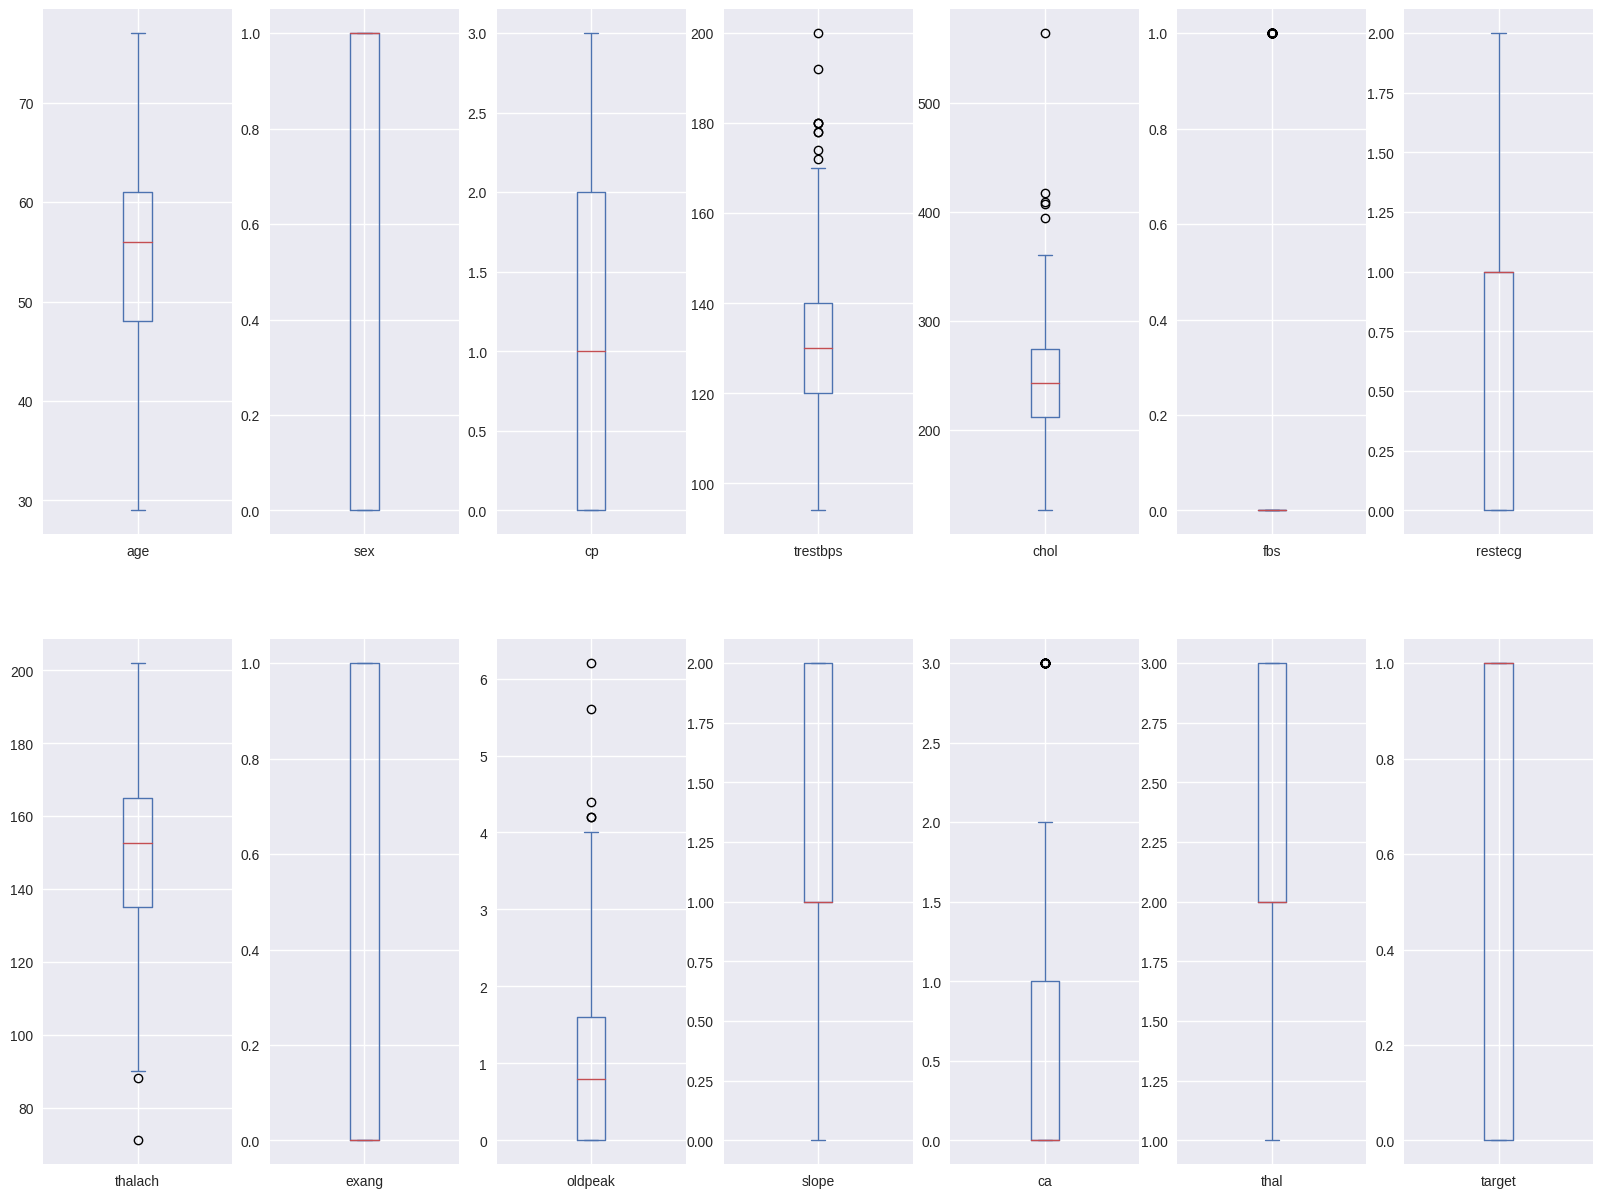

In [19]:
# Checking For Outliers.
df.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(2,7),figsize=(20,15))

In [20]:
df.chol.describe()

count    303.000000
mean     247.047855
std       51.375873
min      126.000000
25%      212.000000
50%      242.500000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [21]:
df.loc[df['chol']==df.chol.max(),'chol'] = df.chol.median()

In [22]:
df.chol.describe()

count    303.000000
mean     245.986799
std       48.018482
min      126.000000
25%      212.000000
50%      242.500000
75%      274.000000
max      417.000000
Name: chol, dtype: float64

age            Axes(0.125,0.53;0.0945122x0.35)
sex         Axes(0.238415,0.53;0.0945122x0.35)
cp          Axes(0.351829,0.53;0.0945122x0.35)
trestbps    Axes(0.465244,0.53;0.0945122x0.35)
chol        Axes(0.578659,0.53;0.0945122x0.35)
fbs         Axes(0.692073,0.53;0.0945122x0.35)
restecg     Axes(0.805488,0.53;0.0945122x0.35)
thalach        Axes(0.125,0.11;0.0945122x0.35)
exang       Axes(0.238415,0.11;0.0945122x0.35)
oldpeak     Axes(0.351829,0.11;0.0945122x0.35)
slope       Axes(0.465244,0.11;0.0945122x0.35)
ca          Axes(0.578659,0.11;0.0945122x0.35)
thal        Axes(0.692073,0.11;0.0945122x0.35)
target      Axes(0.805488,0.11;0.0945122x0.35)
dtype: object

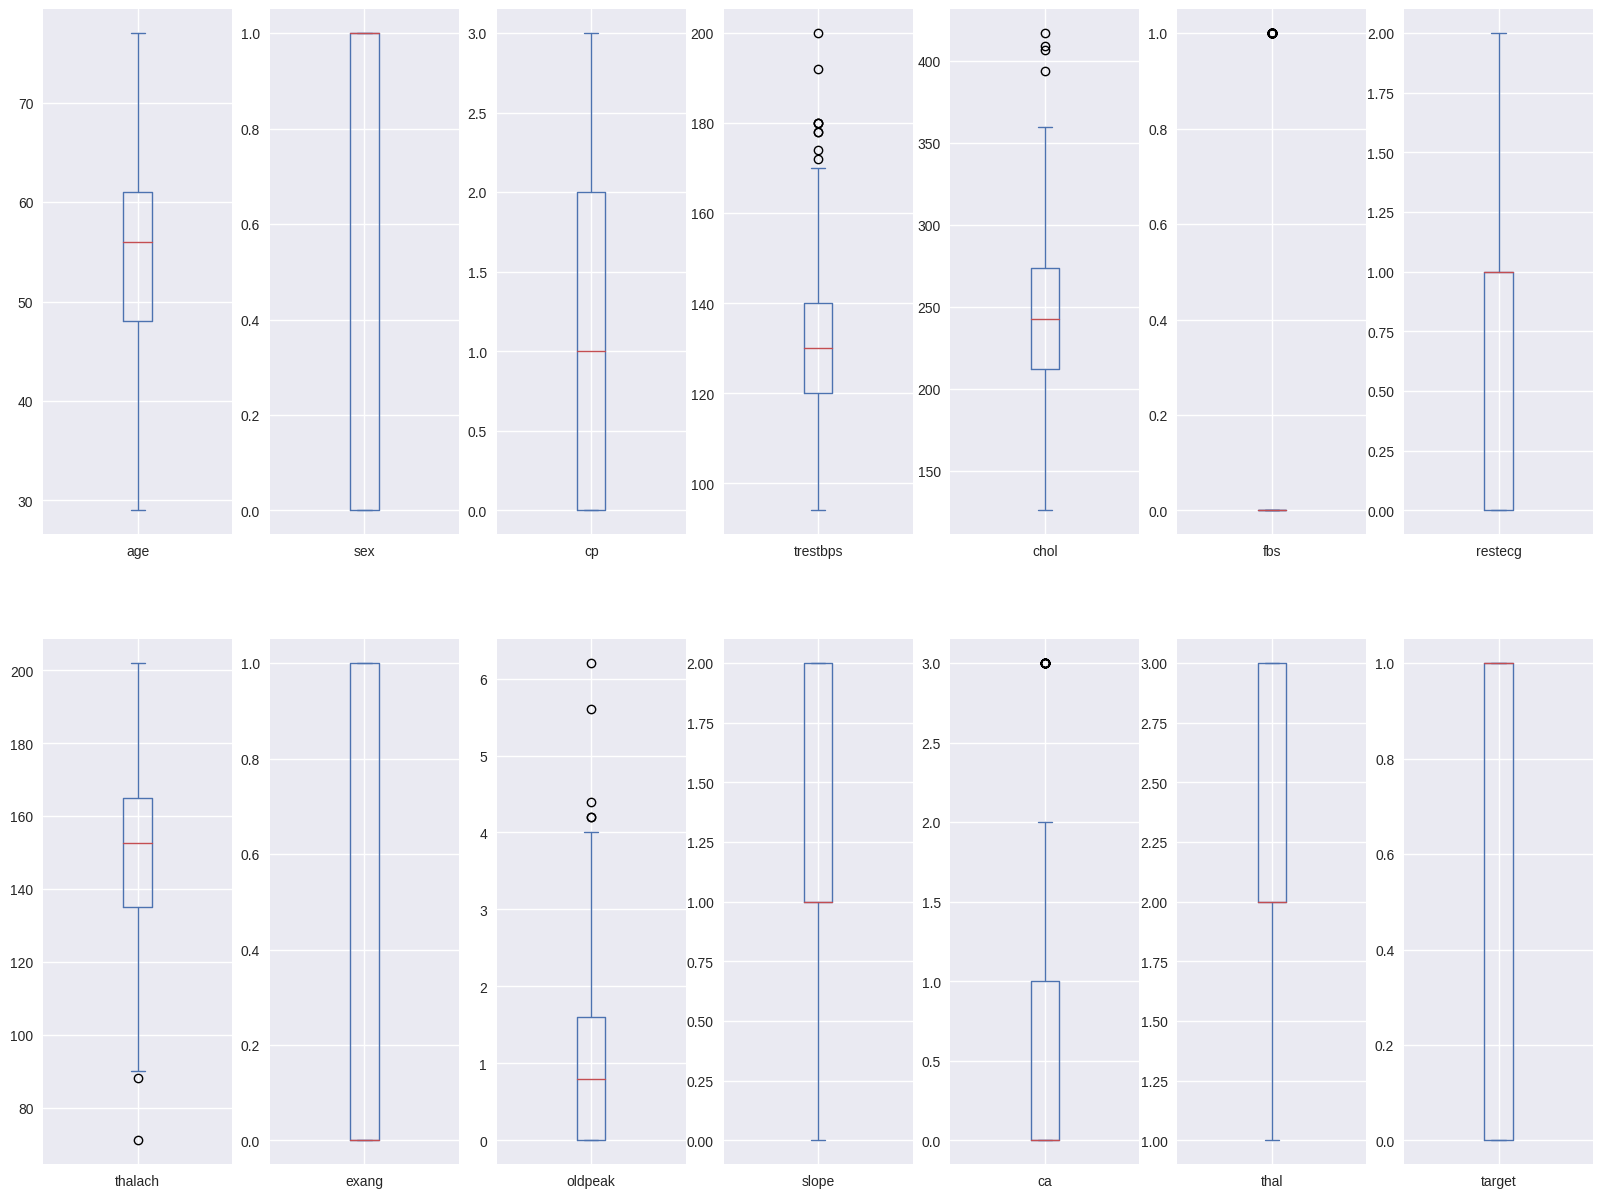

In [23]:
# Checking For Outliers.
df.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(2,7),figsize=(20,15))

In [24]:
ca = ['0','1','2','3']

ca_y0 = df[df['target']==0].ca.value_counts()
ca_y1 = df[df['target']==1].ca.value_counts()

no_disease_data = go.Bar(name='No Disease',x=ca,y=ca_y0)
disease_data = go.Bar(name='Disease',x=ca,y=ca_y1)

fig = go.Figure(data=[disease_data,no_disease_data])
fig.update_xaxes(title_text='Number of Major Blood Vesels')
fig.update_yaxes(title_text='Count')
fig.update_layout(title_text='Distribution of Target Variable According to Number of Major Blood Vessels',barmode='group')

fig.show()

Multicollinearity

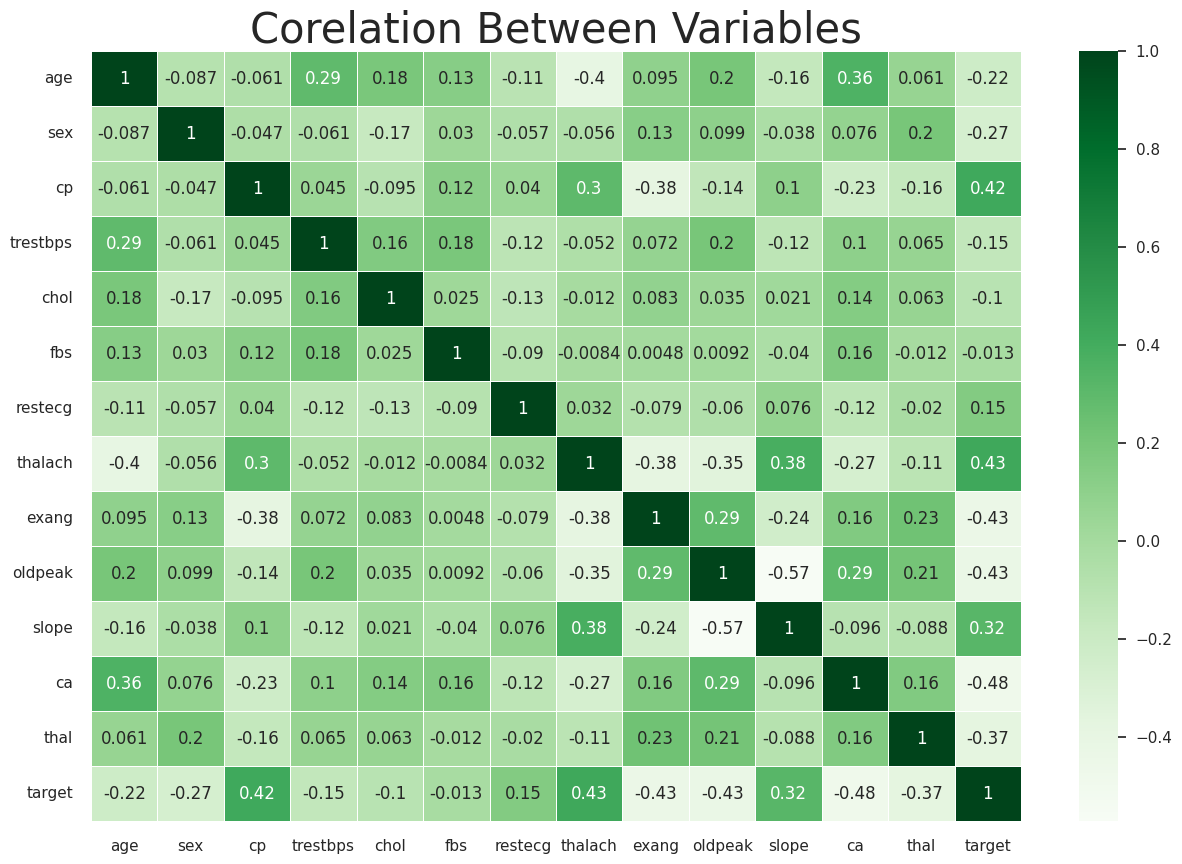

In [25]:
sns.set(style='dark')
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,cmap='Greens')
plt.title('Corelation Between Variables',fontsize=30)
plt.show()


In [26]:
y = df['target']
X = df.drop('target',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


Baseline Prediction

In [28]:
dummy_cls = DummyClassifier(strategy='stratified')
dummy_cls.fit(X_train,y_train)
acc = dummy_cls.score(X_test,y_test)
print("Baseline Accuracy is :",acc)

Baseline Accuracy is : 0.4918032786885246


In [29]:
def calculateScores(y_pred,y_test=y_test):
    acc = metrics.accuracy_score(y_test,y_pred)
    f1 = metrics.f1_score(y_test,y_pred)

    conf = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)

    return acc,f1,conf,report

def printScores(acc,f1,conf,report):
    print("Test Accuracy Score :\n",acc,"\n")
    print("Test f1 Score :\n",f1,"\n")
    print("Confusion Matrix :\n",conf,"\n")
    print("Classification Report :\n",report,"\n")

Logistic Regression

In [32]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

acc_lr,f1_lr,conf_lr,report_lr = calculateScores(y_pred_lr)
printScores(acc_lr,f1_lr,conf_lr,report_lr)

Test Accuracy Score :
 0.8852459016393442 

Test f1 Score :
 0.8985507246376812 

Confusion Matrix :
 [[23  4]
 [ 3 31]] 

Classification Report :
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87        27
         1.0       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61
 



K-Nearest Neighbours Classifier

In [33]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)
acc_knn,f1_knn,conf_knn,report_knn = calculateScores(y_pred_knn)
printScores(acc_knn,f1_knn,conf_knn,report_knn)

Test Accuracy Score :
 0.819672131147541 

Test f1 Score :
 0.8405797101449276 

Confusion Matrix :
 [[21  6]
 [ 5 29]] 

Classification Report :
               precision    recall  f1-score   support

         0.0       0.81      0.78      0.79        27
         1.0       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61
 



Decision Tree

In [36]:
des = DecisionTreeClassifier()
des.fit(X_train,y_train)

y_pred_des = des.predict(X_test)
acc_des,f1_des,conf_des,report_des = calculateScores(y_pred_des)
printScores(acc_des,f1_des,conf_des,report_des)

Test Accuracy Score :
 0.7868852459016393 

Test f1 Score :
 0.7999999999999999 

Confusion Matrix :
 [[22  5]
 [ 8 26]] 

Classification Report :
               precision    recall  f1-score   support

         0.0       0.73      0.81      0.77        27
         1.0       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61
 



Random Forest

In [37]:
ran = RandomForestClassifier()
ran.fit(X_train,y_train)

y_pred_ran = ran.predict(X_test)
acc_ran,f1_ran,conf_ran,report_ran = calculateScores(y_pred_ran)
printScores(acc_ran,f1_ran,conf_ran,report_ran)

Test Accuracy Score :
 0.819672131147541 

Test f1 Score :
 0.8358208955223881 

Confusion Matrix :
 [[22  5]
 [ 6 28]] 

Classification Report :
               precision    recall  f1-score   support

         0.0       0.79      0.81      0.80        27
         1.0       0.85      0.82      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61
 



Extreme Gradient Boosting

In [38]:
xgb = XGBClassifier(use_label_encoder=False,eval_metric='error')
xgb.fit(X_train,y_train)

y_pred_xgb = xgb.predict(X_test)
acc_xgb,f1_xgb,conf_xgb,report_xgb = calculateScores(y_pred_xgb)
printScores(acc_xgb,f1_xgb,conf_xgb,report_xgb)

Test Accuracy Score :
 0.819672131147541 

Test f1 Score :
 0.8358208955223881 

Confusion Matrix :
 [[22  5]
 [ 6 28]] 

Classification Report :
               precision    recall  f1-score   support

         0.0       0.79      0.81      0.80        27
         1.0       0.85      0.82      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61
 



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



Naive Bayes

In [39]:
nb = GaussianNB()
nb.fit(X_train,y_train)

y_pred_nb = nb.predict(X_test)
acc_nb,f1_nb,conf_nb,report_nb = calculateScores(y_pred_nb)
printScores(acc_nb,f1_nb,conf_nb,report_nb)

Test Accuracy Score :
 0.8524590163934426 

Test f1 Score :
 0.8732394366197184 

Confusion Matrix :
 [[21  6]
 [ 3 31]] 

Classification Report :
               precision    recall  f1-score   support

         0.0       0.88      0.78      0.82        27
         1.0       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61
 



Support Vector Classifier

In [40]:
svc = SVC()
svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test)
acc_svc,f1_svc,conf_svc,report_svc = calculateScores(y_pred_svc)
printScores(acc_svc,f1_svc,conf_svc,report_svc)

Test Accuracy Score :
 0.8852459016393442 

Test f1 Score :
 0.9014084507042254 

Confusion Matrix :
 [[22  5]
 [ 2 32]] 

Classification Report :
               precision    recall  f1-score   support

         0.0       0.92      0.81      0.86        27
         1.0       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61
 



In [43]:
model_df = pd.DataFrame({'model':['Logistic Regression','Random Forest','Extreme Gradient Boost','K-Nearest Neighbour','Decision Tree','Naive Bayes','Support Vector Classifier'],
                         'Accuracy':[acc_lr,acc_ran,acc_xgb,acc_knn,acc_des,acc_nb,acc_svc]})
model_df


,model,Accuracy
0,Logistic Regression,0.885246
1,Random Forest,0.819672
2,Extreme Gradient Boost,0.819672
3,K-Nearest Neighbour,0.819672
4,Decision Tree,0.786885
5,Naive Bayes,0.852459
6,Support Vector Classifier,0.885246


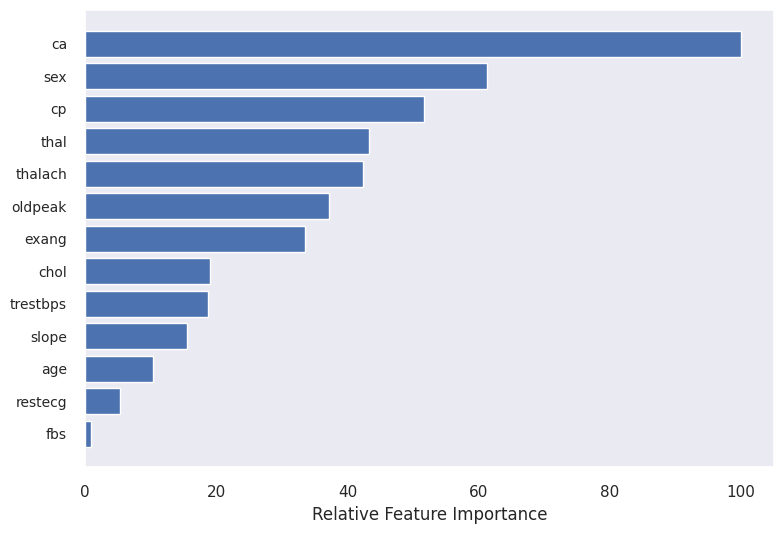

In [44]:
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 *(feature_importance/feature_importance.max())

sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + 0.5

featfig = plt.figure()
featax = featfig.add_subplot(1,1,1)
featax.barh(pos,feature_importance[sorted_idx],align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx],fontsize=10)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()
plt.show()

** variable ca was the most influential in predicting whether an individual had heart disease or not. Variable ca referred the the number of major vessels (0–3) colored by a flourosopy. The lower the number of major blood vessels, reduces the amount of blood flowing to the heart, increasing the presence of heart disease.**

Ensembling

In [45]:
scv = StackingCVClassifier(classifiers=[lr,nb,svc],meta_classifier=nb)
scv.fit(X_train,y_train)

y_pred_scv = scv.predict(X_test)
acc_scv,f1_scv,conf_scv,report_scv = calculateScores(y_pred_scv)
printScores(acc_scv,f1_scv,conf_scv,report_scv)

Test Accuracy Score :
 0.8852459016393442 

Test f1 Score :
 0.8985507246376812 

Confusion Matrix :
 [[23  4]
 [ 3 31]] 

Classification Report :
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87        27
         1.0       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61
 



In [46]:
classes = ['No Disease','Disease']

Confusion Matrix, without Normalization


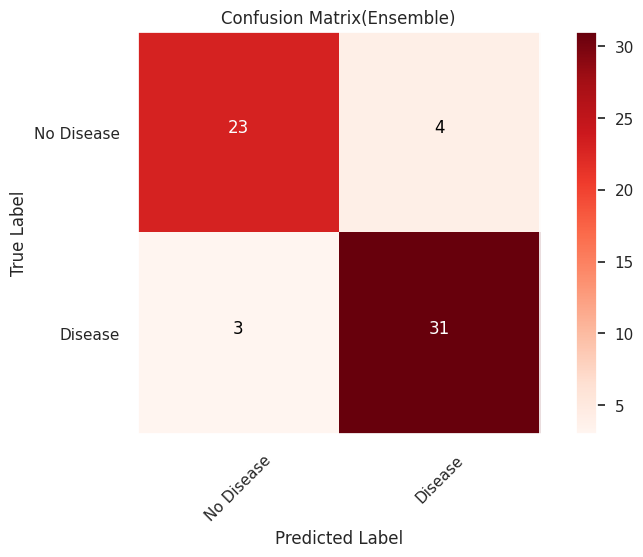

In [47]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix(Ensemble)',cmap=plt.cm.Reds):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")

    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thres = cm.max()/2.0
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',color='white' if cm[i,j]>thres else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
plot_confusion_matrix(conf_scv,classes)

**Plotting ROC Curve**

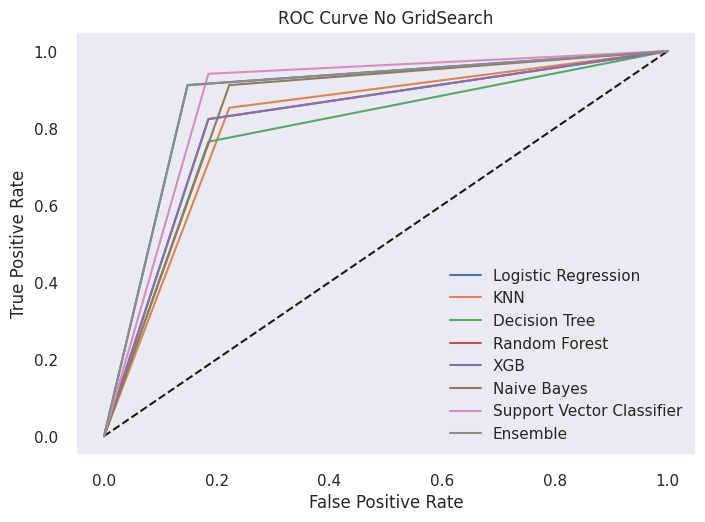

In [48]:
y_pred = [y_pred_lr,y_pred_knn,y_pred_des,y_pred_ran,y_pred_xgb,y_pred_nb,y_pred_svc,y_pred_scv]
model_name = ['Logistic Regression','KNN','Decision Tree','Random Forest','XGB','Naive Bayes','Support Vector Classifier','Ensemble']

curve = []

for y_pred_ in y_pred:
    curve.append(roc_curve(y_test,y_pred_))
plt.plot([0,1],[0,1],'k--')

for i in range(len(model_name)):
    plt.plot(curve[i][0],curve[i][1],label=model_name[i])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve No GridSearch')
plt.show()


In [49]:
for i in range(len(model_name)):
    print("AUC ",model_name[i],":",roc_auc_score(y_test,y_pred[i]))

AUC  Logistic Regression : 0.8818082788671023
AUC  KNN : 0.815359477124183
AUC  Decision Tree : 0.789760348583878
AUC  Random Forest : 0.8191721132897605
AUC  XGB : 0.8191721132897605
AUC  Naive Bayes : 0.8447712418300652
AUC  Support Vector Classifier : 0.8779956427015251
AUC  Ensemble : 0.8818082788671023


 GRID SEARCH CV
Logistic Regression Grid

In [50]:
param_grid_lr = {'penalty':['l1','l2'],
                  'C':np.logspace(-4,4,20)}

grid_search_lr = GridSearchCV(estimator=lr,param_grid = param_grid_lr,cv=7,scoring='accuracy',n_jobs=-1)
grid_search_lr.fit(X_train,y_train)

lr_params = grid_search_lr.best_params_
print(lr_params)

{'C': 0.615848211066026, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

In [51]:
lr_grid = LogisticRegression(**lr_params)
lr_grid.fit(X_train,y_train)

y_pred_lr_grid = lr_grid.predict(X_test)
acc_lr_grid,f1_lr_grid,conf_lr_grid,report_lr_grid = calculateScores(y_pred_lr_grid)
printScores(acc_lr_grid,f1_lr_grid,conf_lr_grid,report_lr_grid)

Test Accuracy Score :
 0.8852459016393442 

Test f1 Score :
 0.8985507246376812 

Confusion Matrix :
 [[23  4]
 [ 3 31]] 

Classification Report :
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87        27
         1.0       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61
 



Extreme Gradient Boosting Grid

In [52]:
param_grid_xgb = {'max_depth':[3,4,5],
                  'learning_rate':[0.1,0.01,0.001],
                  'n_estimators':[9,10,11,12],
                  'seed':[10,20,25]}
grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=param_grid_xgb,cv=7,scoring='accuracy',n_jobs=-1)
grid_search_xgb.fit(X_train,y_train)

xgb_params = grid_search_xgb.best_params_
print(xgb_params)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 9, 'seed': 10}


In [54]:
xgb_grid = XGBClassifier(**xgb_params,use_label_encoder=False,eval_metric='error')
xgb_grid.fit(X_train,y_train)

y_pred_xgb_grid = xgb_grid.predict(X_test)
acc_xgb_grid,f1_xgb_grid,conf_xgb_grid,report_xgb_grid = calculateScores(y_pred_xgb_grid)
printScores(acc_xgb_grid,f1_xgb_grid,conf_xgb_grid,report_xgb_grid)

Test Accuracy Score :
 0.819672131147541 

Test f1 Score :
 0.8405797101449276 

Confusion Matrix :
 [[21  6]
 [ 5 29]] 

Classification Report :
               precision    recall  f1-score   support

         0.0       0.81      0.78      0.79        27
         1.0       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61
 



Naive Bayes Grid

In [55]:
param_grid_nb = {'var_smoothing':np.logspace(0,-20,num=2)}

grid_search_nb = GridSearchCV(estimator=nb,param_grid=param_grid_nb,scoring='accuracy')
grid_search_nb.fit(X_train,y_train)

nb_params = grid_search_nb.best_params_
print(nb_params)

{'var_smoothing': 1e-20}


In [56]:
nb_grid = GaussianNB(**nb_params)
nb_grid.fit(X_train,y_train)

y_pred_nb_grid = nb_grid.predict(X_test)
acc_nb_grid,f1_nb_grid,conf_nb_grid,report_nb_grid = calculateScores(y_pred_nb_grid)
printScores(acc_nb_grid,f1_nb_grid,conf_nb_grid,report_nb_grid)

Test Accuracy Score :
 0.8524590163934426 

Test f1 Score :
 0.8732394366197184 

Confusion Matrix :
 [[21  6]
 [ 3 31]] 

Classification Report :
               precision    recall  f1-score   support

         0.0       0.88      0.78      0.82        27
         1.0       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61
 



SVC Grid

In [57]:
param_grid_svc = {'kernel':['linear','rbf','poly'],
                  'C':[1,1.5,2],
                  'class_weight':['balanced']
                 }

grid_search_svc = GridSearchCV(estimator=svc,param_grid=param_grid_svc,cv=7,scoring='accuracy',n_jobs=-1)
grid_search_svc.fit(X_train,y_train)

svc_params = grid_search_svc.best_params_
print(svc_params)

{'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}


In [58]:
svc_grid = SVC(**svc_params,probability=True)
svc_grid.fit(X_train,y_train)

y_pred_svc_grid = svc_grid.predict(X_test)
acc_svc_grid,f1_svc_grid,conf_svc_grid,report_svc_grid = calculateScores(y_pred_svc_grid)
printScores(acc_svc_grid,f1_svc_grid,conf_svc_grid,report_svc_grid)

Test Accuracy Score :
 0.8852459016393442 

Test f1 Score :
 0.8985507246376812 

Confusion Matrix :
 [[23  4]
 [ 3 31]] 

Classification Report :
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87        27
         1.0       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61
 



K-Nearest Neighbour Grid

In [60]:
param_grid_knn = {'n_neighbors':[5,10,15,20],
                 'weights':['uniform','distance']}

grid_search_knn = GridSearchCV(estimator=knn,param_grid=param_grid_knn,cv=3,scoring='f1',n_jobs=-1)
grid_search_knn.fit(X_train,y_train)

knn_params = grid_search_knn.best_params_
print(knn_params)

{'n_neighbors': 20, 'weights': 'uniform'}


In [61]:
knn_grid = KNeighborsClassifier(**knn_params)
knn_grid.fit(X_train,y_train)

y_pred_knn_grid = knn_grid.predict(X_test)
acc_knn_grid,f1_knn_grid,conf_knn_grid,report_knn_grid = calculateScores(y_pred_knn_grid)
printScores(acc_knn_grid,f1_knn_grid,conf_knn_grid,report_knn_grid)

Test Accuracy Score :
 0.819672131147541 

Test f1 Score :
 0.8533333333333334 

Confusion Matrix :
 [[18  9]
 [ 2 32]] 

Classification Report :
               precision    recall  f1-score   support

         0.0       0.90      0.67      0.77        27
         1.0       0.78      0.94      0.85        34

    accuracy                           0.82        61
   macro avg       0.84      0.80      0.81        61
weighted avg       0.83      0.82      0.81        61
 



Decision Tree Grid

In [62]:
param_grid_des = {'criterion':['gini','entropy'],
                  'max_depth':[2,3,4,5,6],
                  'min_samples_leaf':[6,7,8],
                  'max_leaf_nodes':[12,13,14,15],
                  'max_features':['auto','sqrt','log2'],
                  'random_state':[42,52,62]
                 }
grid_search_des = GridSearchCV(estimator=des,param_grid=param_grid_des,cv=7,scoring='accuracy',n_jobs=-1)
grid_search_des.fit(X_train,y_train)

des_params = grid_search_des.best_params_
print(des_params)

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': 13, 'min_samples_leaf': 7, 'random_state': 52}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.



In [63]:
des_grid = DecisionTreeClassifier(**des_params)
des_grid.fit(X_train,y_train)

y_pred_des_grid = des_grid.predict(X_test)
acc_des_grid,f1_des_grid,conf_des_grid,report_des_grid = calculateScores(y_pred_des_grid)
printScores(acc_des_grid,f1_des_grid,conf_des_grid,report_des_grid)

Test Accuracy Score :
 0.7868852459016393 

Test f1 Score :
 0.7868852459016393 

Confusion Matrix :
 [[24  3]
 [10 24]] 

Classification Report :
               precision    recall  f1-score   support

         0.0       0.71      0.89      0.79        27
         1.0       0.89      0.71      0.79        34

    accuracy                           0.79        61
   macro avg       0.80      0.80      0.79        61
weighted avg       0.81      0.79      0.79        61
 



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.



Random Forest Grid

In [64]:
param_grid_ran = {
    'criterion':['gini','entropy'],
    'max_leaf_nodes':[50,60,70],
    'max_depth':[4,5,6],
    'max_features':['auto','log2']
}

grid_search_ran = GridSearchCV(estimator=ran,param_grid=param_grid_ran,cv=5,scoring='accuracy')
grid_search_ran.fit(X_train,y_train)

ran_params = grid_search_ran.best_params_
print(ran_params)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifi

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 60}


In [65]:
ran_grid = RandomForestClassifier(**ran_params)
ran_grid.fit(X_train,y_train)

y_pred_ran_grid = ran_grid.predict(X_test)
acc_ran_grid,f1_ran_grid,conf_ran_grid,report_ran_grid = calculateScores(y_pred_ran_grid)
printScores(acc_ran_grid,f1_ran_grid,conf_ran_grid,report_ran_grid)

Test Accuracy Score :
 0.8524590163934426 

Test f1 Score :
 0.8695652173913043 

Confusion Matrix :
 [[22  5]
 [ 4 30]] 

Classification Report :
               precision    recall  f1-score   support

         0.0       0.85      0.81      0.83        27
         1.0       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61
 



Grid Search Model Evaluation

In [66]:
model_grid_df = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Extreme Gradient Boost',
                              'K-Nearest Neighbour','Decision Tree','Naive Bayes', 'Support Vector Classifier'],
                              'Accuracy':[acc_lr_grid,acc_ran_grid,acc_xgb_grid,acc_knn_grid,acc_des_grid,acc_nb_grid,acc_svc_grid]})
model_grid_df

,Model,Accuracy
0,Logistic Regression,0.885246
1,Random Forest,0.852459
2,Extreme Gradient Boost,0.819672
3,K-Nearest Neighbour,0.819672
4,Decision Tree,0.786885
5,Naive Bayes,0.852459
6,Support Vector Classifier,0.885246


In [67]:
scv_grid = StackingCVClassifier(classifiers=[lr_grid,nb_grid,svc_grid],meta_classifier=lr_grid,random_state=22)
scv_grid.fit(X_train,y_train)

y_pred_scv_grid = scv_grid.predict(X_test)
acc_scv_grid,f1_scv_grid,conf_scv_grid,report_scv_grid = calculateScores(y_pred_scv_grid)
printScores(acc_scv_grid,f1_scv_grid,conf_scv_grid,report_scv_grid)

Test Accuracy Score :
 0.8524590163934426 

Test f1 Score :
 0.8732394366197184 

Confusion Matrix :
 [[21  6]
 [ 3 31]] 

Classification Report :
               precision    recall  f1-score   support

         0.0       0.88      0.78      0.82        27
         1.0       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61
 



Confusion Matrix, without Normalization


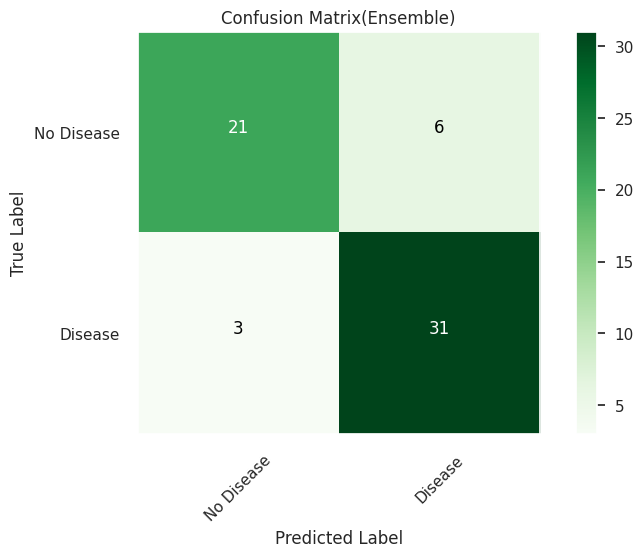

In [68]:
plot_confusion_matrix(conf_scv_grid,classes,cmap=plt.cm.Greens)

Plot ROC Curve

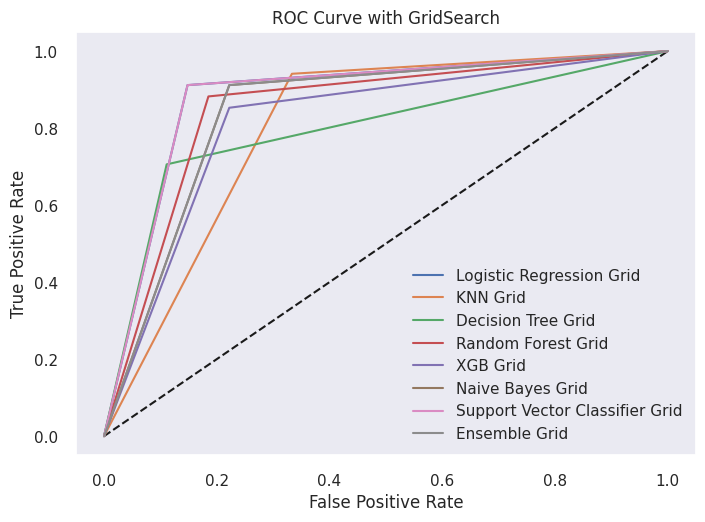

In [69]:
y_pred_grid = [y_pred_lr_grid,y_pred_knn_grid,y_pred_des_grid,y_pred_ran_grid,y_pred_xgb_grid,y_pred_nb_grid,y_pred_svc_grid,y_pred_scv_grid]
model_name = ['Logistic Regression','KNN','Decision Tree','Random Forest','XGB','Naive Bayes','Support Vector Classifier','Ensemble']

curve = []

for y_pred_grid_ in y_pred_grid:
    curve.append(roc_curve(y_test,y_pred_grid_))
plt.plot([0,1],[0,1],'k--')

for i in range(len(model_name)):
    plt.plot(curve[i][0],curve[i][1],label=model_name[i]+" Grid")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve with GridSearch')
plt.show()

In [70]:
for i in range(len(model_name)):
    print("AUC ",model_name[i],"Grid :",roc_auc_score(y_test,y_pred_grid[i]))

AUC  Logistic Regression Grid : 0.8818082788671023
AUC  KNN Grid : 0.803921568627451
AUC  Decision Tree Grid : 0.7973856209150327
AUC  Random Forest Grid : 0.8485838779956427
AUC  XGB Grid : 0.815359477124183
AUC  Naive Bayes Grid : 0.8447712418300652
AUC  Support Vector Classifier Grid : 0.8818082788671023
AUC  Ensemble Grid : 0.8447712418300652
